<a href="https://colab.research.google.com/github/s-choung/KMC_PDH/blob/main/Yoonho_cowork_hwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

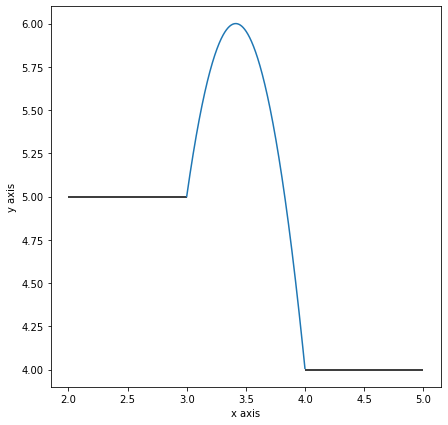

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

subscript = str.maketrans("0123456789-", "₀₁₂₃₄₅₆₇₈₉→")
plt.rcParams["figure.figsize"] = (7,7)
x = np.arange(3, 4, 0.001)
y = np.arange(0, 10, 0.001)
#x2 = np.arange(3, 4, 0.001)
xmin = range(10)
xmax = range(1, 11)

def fun_maker(a1, a2, barrier, b1, b2):
  p = math.sqrt((barrier-a2)/(barrier-b2))
  t = p/(1+p)
  k = ((1+p)**2)*(barrier-a2)/(p**2)
  q1 = a1+t
  q2 = barrier
  return k, q1, q2
plt.xlabel('x axis')
plt.ylabel('y axis')
a1 = 3.0
a2 = 5.0
barrier = 6
c1 = 4.0
c2 = 4.0
k, q1, q2 = fun_maker(a1, a2, barrier, c1, c2)
plt.plot(x, -k*(x**2)+2*k*x*q1-k*(q1**2)+q2)
plt.hlines(a2, a1-1, a1)
plt.hlines(c2, c1, c1+1)

# Reaction coord

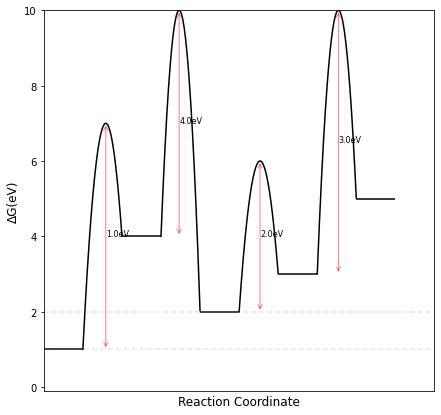

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (7,7)

ax = plt.gca()
ax.set_xlim([0, 10])
ax.set_ylim([-0.1, 10])

def ts(ini_xy,fin_xy,barrier):
  k, q1, q2 = fun_maker(ini_xy[0], ini_xy[1], ini_xy[1]+barrier, fin_xy[0], fin_xy[1])
  x = np.arange(ini_xy[0], ini_xy[0]+1, 0.001)
  plt.plot(x, -k*(x**2)+2*k*x*q1-k*(q1**2)+q2, color = 'black')
  return q1, ini_xy[1]+barrier

def rxnE(xy):
  plt.hlines(xy[1], xy[0]-1, xy[0])
  return

def fun_maker(a1, a2, barrier, b1, b2):
  p = math.sqrt((barrier-a2)/(barrier-b2))
  t = p/(1+p)
  k = ((1+p)**2)*(barrier-a2)/(p**2)
  q1 = a1+t
  q2 = barrier
  return k, q1, q2

plt.xlabel('Reaction Coordinate', fontsize=12)
plt.ylabel('ΔG(eV)', fontsize=12)
ax.axes.xaxis.set_ticks([])
list_ex = [1.0, 4.0, 2.0, 3.0, 5.0]
barrier_ex = [6,6,4,7]
for i in range (0,4):
  a= [1+2*i, list_ex[i]]
  b= [1+2*(i+1), list_ex[i+1]]
  rxnE(a)
  x1,y1=ts(a,b,barrier_ex[i])
  plt.annotate('',xy=(x1,y1), xytext=(x1,a[1]),arrowprops ={'facecolor':'black','edgecolor':'red', 'alpha':0.5, 'arrowstyle':'<->'}) 
  plt.text(x1,a[1]+(y1-a[1])/2,str(list_ex[i])+'eV', fontsize = 8)
  if(i == 3):
    rxnE(b) 

plt.axhline(y=2, linestyle='dashed', alpha=0.2,c='gray')
plt.axhline(y=1, linestyle='dashed', alpha=0.2,c='gray')
#a = [1.0, 1.0] # CH3CH2CH3
#b = [3.0, 4.0] # CH3CH2CH2
#c = [5.0, 2.0] # CH3CHCH2
#d = [7.0, 3.0] # CH3CHCH
#e = [9.0, 5.0] # CH3CHCH


#barrier plot

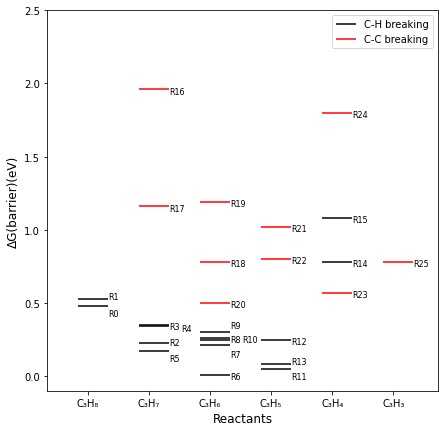

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (7,7)

ax = plt.gca()
ax.set_xlim([0, 6.4])
ax.set_ylim([-0.1, 2.5])

global label_exist1
global label_exist2
label_exist1 = 1
label_exist2 = 1

def rxnE(xy, char):
  global label_exist1
  global label_exist2
  if(char == 'd' and label_exist1 ==1):
    plt.hlines(xy[1], xy[0]-0.5, xy[0], color = 'black', label = 'C-H breaking')
    label_exist1 = 0
  elif(char == 'd' and label_exist1 ==0):
    plt.hlines(xy[1], xy[0]-0.5, xy[0], color = 'black')
  elif(char == 'c' and label_exist2 ==1):
    plt.hlines(xy[1], xy[0]-0.5, xy[0], color = 'red', label = 'C-C breaking')
    label_exist2= 0
  elif(char == 'c' and label_exist2 ==0):
    plt.hlines(xy[1], xy[0]-0.5, xy[0], color = 'red')
  return

plt.xlabel('Reactants', fontsize=12)
plt.ylabel('ΔG(barrier)(eV)', fontsize=12)
plt.xticks([0.67,1.67,2.67,3.67, 4.67, 5.67])
plt.xticks([0.67,1.67,2.67,3.67, 4.67, 5.67], ['C3H8'.translate(subscript), 'C3H7'.translate(subscript), 'C3H6'.translate(subscript), 'C3H5'.translate(subscript), 'C3H4'.translate(subscript),'C3H3'.translate(subscript)])
#ax.axes.xaxis.set_ticks([])
#8:1~2 7:3~6 6:7~11 5:12~14 4:18~19(15~16), 1씩 빼기
#crack 7:17~18
list_actE = [0.48,
0.53,
0.23,
0.35,
0.34,
0.17,
0.01,
0.21,
0.26,
0.30,
0.25,
0.05,
0.25,
0.08,
0.78,
1.08,
1.96,
1.16,
0.78,
1.19,
0.50,
1.02,
0.80,
0.57,
1.80,
0.78]
for i in range (len(list_actE)):
  if(0<=i<=1):
    a=[1, list_actE[i]]
    rxnE(a,'d')
  if(2<=i<=5):
    a=[2, list_actE[i]]
    rxnE(a,'d')  
  if(6<=i<=10):
    a=[3, list_actE[i]] 
    rxnE(a,'d')
  if(11<=i<=13):
    a=[4, list_actE[i]]
    rxnE(a,'d') 
  if(14<=i<=15):
    a=[5, list_actE[i]] 
    rxnE(a,'d')
  if(16<=i<=17):
    a=[2, list_actE[i]] 
    rxnE(a,'c')
  if(18<=i<=20):
    a=[3, list_actE[i]] 
    rxnE(a,'c')
  if(21<=i<=22):
    a=[4, list_actE[i]] 
    rxnE(a,'c')
  if(23<=i<=24):
    a=[5, list_actE[i]] 
    rxnE(a,'c')
  if(25<=i<=25):
    a=[6, list_actE[i]] 
    rxnE(a,'c')
  if(i == 0 or i == 11 or i ==5):
    plt.text(a[0], a[1]-0.07, 'R'+str(i), fontsize =8)
  elif(i == 1 or i == 13):
    plt.text(a[0], a[1], 'R'+str(i), fontsize =8)
  elif (i == 4 ):
    plt.text(a[0]+0.2, a[1]- 0.03, 'R'+str(i), fontsize =8)
  elif(i == 2):
    plt.text(a[0], a[1]- 0.02, 'R'+str(i), fontsize =8)
  elif(i == 9):
    plt.text(a[0], a[1]+ 0.03, 'R'+str(i), fontsize =8)
  elif(i == 7):
    plt.text(a[0], a[1]- 0.08, 'R'+str(i), fontsize =8)
  elif (i == 10):
    plt.text(a[0]+0.2, a[1]- 0.02, 'R'+str(i), fontsize =8)
  else:
    plt.text(a[0], a[1]-0.03, 'R'+str(i), fontsize =8)

plt.legend()



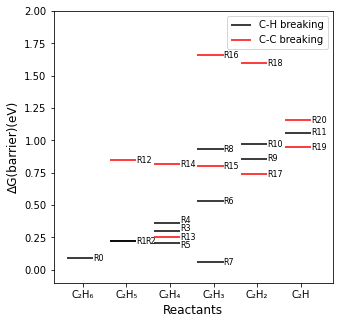

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5,5)
ax = plt.gca()
ax.set_xlim([0, 6.4])
ax.set_ylim([-0.1, 2.0])

global label_exist11
global label_exist22

label_exist11 = 1
label_exist22 = 1

def rxnE(xy, char):
  global label_exist11
  global label_exist22
  if(char == 'd' and label_exist11 ==1):
    plt.hlines(xy[1], xy[0]-0.7, xy[0]-0.1, color = 'black', label = 'C-H breaking')
    label_exist11 = 0
  elif(char == 'd' and label_exist11 ==0):
    plt.hlines(xy[1], xy[0]-0.7, xy[0]-0.1, color = 'black')
  elif(char == 'c' and label_exist22 ==1):
    plt.hlines(xy[1], xy[0]-0.7, xy[0]-0.1, color = 'red', label = 'C-C breaking')
    label_exist22= 0
  elif(char == 'c' and label_exist22 ==0):
    plt.hlines(xy[1], xy[0]-0.7, xy[0]-0.1, color = 'red')
  return

plt.xlabel('Reactants', fontsize=12)
plt.ylabel('ΔG(barrier)(eV)', fontsize=12)
plt.xticks([0.67,1.67,2.67,3.67, 4.67, 5.67])
plt.xticks([0.67,1.67,2.67,3.67, 4.67, 5.67], ['C2H6'.translate(subscript), 'C2H5'.translate(subscript), 'C2H4'.translate(subscript), 'C2H3'.translate(subscript), 'C2H2'.translate(subscript), 'C2H'.translate(subscript)])
#ax.axes.xaxis.set_ticks([])
#8:1~2 7:3~6 6:7~11 5:12~14 4:18~19(15~16), 1씩 빼기
#crack 7:17~18
list_actE = [0.09,
0.22,
0.22,
0.30,
0.36,
0.21,
0.53,
0.06,
0.93,
0.86,
0.97,
1.06,
0.85,
0.25,
0.82,
0.80,
1.66,
0.74,
1.60,
0.95,
1.16]
for i in range (len(list_actE)):
  if(0<=i<1):
    a=[1, list_actE[i]]
    rxnE(a,'d')
  if(1<=i<=2):
    a=[2, list_actE[i]]
    rxnE(a,'d')  
  if(3<=i<=5):
    a=[3, list_actE[i]] 
    rxnE(a,'d')
  if(6<=i<=8):
    a=[4, list_actE[i]]
    rxnE(a,'d') 
  if(9<=i<=10):
    a=[5, list_actE[i]] 
    rxnE(a,'d')
  if(11<=i<=11):
    a=[6, list_actE[i]] 
    rxnE(a,'d')
  if(12<=i<=12):
    a=[2, list_actE[i]] 
    rxnE(a,'c')
  if(13<=i<=14):
    a=[3, list_actE[i]] 
    rxnE(a,'c')
  if(15<=i<=16):
    a=[4, list_actE[i]] 
    rxnE(a,'c')
  if(17<=i<=18):
    a=[5, list_actE[i]] 
    rxnE(a,'c')
  if(19<=i<=20):
    a=[6, list_actE[i]] 
    rxnE(a,'c')
  if(i==2):
    plt.text(a[0]+0.1, a[1]- 0.02, 'R'+str(i), fontsize =8)
  elif(i==5):
    plt.text(a[0]-0.1, a[1]- 0.04, 'R'+str(i), fontsize =8)
  elif(i==4):
    plt.text(a[0]-0.1, a[1]+ 0.002, 'R'+str(i), fontsize =8)
  elif(i==3):
    plt.text(a[0]-0.1, a[1]+ 0.0008, 'R'+str(i), fontsize =8)
  else:
    plt.text(a[0]-0.1, a[1]-0.02, 'R'+str(i), fontsize =8)
plt.legend()



#SPEC_NUM PLOT

In [ ]:
# Read the Example1.txt
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

subscript = str.maketrans("0123456789-", "₀₁₂₃₄₅₆₇₈₉→")
print("C2H5OH-".translate(subscript))

read_file = pd.read_csv (r'/content/specnum_output.txt')
read_file.to_csv (r'/content/specnum_output.csv', index=None)# .txt를 .csv로 바꾸자
read_file2 = pd.read_csv (r'/content/procstat_output.txt')
read_file2.to_csv (r'/content/procstat_output.csv', index=None)# .txt를 .csv로 바꾸자
plt.rcParams["figure.figsize"] = (6,30)
data = pd.read_csv("/content/specnum_output.csv", encoding= 'unicode_escape')
config =[]
procstat =[]
species = []
net_species = []
temper = []
j=0
spe=data.columns[0].split()
for i in spe:
  species.append(spe[j])
  j=j+1
print(species,end =' ')
i=0
all = [] #전체 2차원배열
pan = [] #판다스용
for row in data.values:
  row_split=row[0].split()
  temp = []
  for i in range(0,len(row_split)):
   temp.insert(i,float(row_split[i]))
#  temp.append(row_split)
  #for points in le
  #print(temp[0])
  all.append(temp)
  i+=1
'''
for i in all :
    for j in i:
        print(j,end=" ")
    print()
'''
rere = pd.DataFrame(all, columns=species)
time = len(rere)
specnum1=len(rere.columns)
rere

C₂H₅OH→
['Entry', 'Nevents', 'Time', 'Temperature', 'Energy', 'H*', 'CH3CH2CH3*', 'CH3CHCH2*', 'CH3CHCH3*', 'CH3CH2CH2*', 'CH3CCH3*', 'CH3CH2CH*', 'CH3CH2C*', 'CH3CHCH*', 'CH3CCH2*', 'CH3CHC*', 'CH3CCH*', 'CH3CC*', 'CH3*', 'CH2*', 'CH*', 'C*', 'CH2CH2*', 'CH3CH*', 'CH2CH3*', 'CCH3*', 'CH2CH2*', 'CH3CH*', 'CH2CH3*', 'CCH3*', 'CH3CH3*', 'CH2CH*', 'CHCH*', 'CH2C*', 'CHC*', 'CC*', 'CH4*', 'H2', 'CH3CH2CH3', 'CH3CHCH2', 'CH3CCH', 'CH3CH3', 'CH2CH2', 'CHCH', 'CH4'] 

,Entry,Nevents,Time,Temperature,Energy,H*,CH3CH2CH3*,CH3CHCH2*,CH3CHCH3*,CH3CH2CH2*,CH3CCH3*,CH3CH2CH*,CH3CH2C*,CH3CHCH*,CH3CCH2*,CH3CHC*,CH3CCH*,CH3CC*,CH3*,CH2*,CH*,C*,CH2CH2*,CH3CH*,CH2CH3*,CCH3*,CH2CH2*,CH3CH*,CH2CH3*,CCH3*,CH3CH3*,CH2CH*,CHCH*,CH2C*,CHC*,CC*,CH4*,H2,CH3CH2CH3,CH3CHCH2,CH3CCH,CH3CH3,CH2CH2,CHCH,CH4
0,1.0,0.0,0.00000,873.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,148541.0,0.00001,873.15,-4.24,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,107.0,-36.0,0.0,0.0,2.0,0.0,0.0,1.0
2,3.0,342953.0,0.00002,873.15,0.32,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,59.0,0.0,152.0,-55.0,0.0,0.0,5.0,0.0,0.0,5.0
3,4.0,559086.0,0.00003,873.15,0.64,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,64.0,0.0,163.0,-59.0,0.0,0.0,5.0,0.0,0.0,7.0
4,5.0,926679.0,0.00004,873.15,-0.91,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,69.0,0.0,169.0,-60.0,0.0,0.0,5.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,326.0,118672145.0,0.00325,873.15,-4.75,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,78.0,0.0,185.0,-72.0,2.0,0.0,8.0,0.0,0.0,11.0
326,327.0,119184547.0,0.00326,873.15,-4.75,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,78.0,0.0,185.0,-72.0,2.0,0.0,8.0,0.0,0.0,11.0
327,328.0,119695244.0,0.00327,873.15,-4.52,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,78.0,0.0,185.0,-72.0,2.0,0.0,8.0,0.0,0.0,11.0
328,329.0,120215115.0,0.00328,873.15,-4.75,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,78.0,0.0,185.0,-72.0,2.0,0.0,8.0,0.0,0.0,11.0


In [ ]:
ads=[]
gas=[]
speclist=[]
for i in rere.iloc[:,5:specnum1-8].columns.values:
 i=i.translate(subscript)
 ads.append(i)
for i in rere.iloc[:,specnum1-8:specnum1].columns.values:
 i=i.translate(subscript)
 gas.append(i)
print(ads)
print(gas)
speclist=ads+gas

print(speclist)
for i in range(1,time//10):
  selectivity=rere.iloc[i*10,specnum1-6]/(rere.iloc[i*10,specnum1-6]+rere.iloc[i*10,specnum1-5]+rere.iloc[i*10,specnum1-4]*2/3+rere.iloc[i*10,specnum1-3]*2/3+rere.iloc[i*10,specnum1-1]/3)
  print(selectivity)


['H*', 'CH₃CH₂CH₃*', 'CH₃CHCH₂*', 'CH₃CHCH₃*', 'CH₃CH₂CH₂*', 'CH₃CCH₃*', 'CH₃CH₂CH*', 'CH₃CH₂C*', 'CH₃CHCH*', 'CH₃CCH₂*', 'CH₃CHC*', 'CH₃CCH*', 'CH₃CC*', 'CH₃*', 'CH₂*', 'CH*', 'C*', 'CH₂CH₂*', 'CH₃CH*', 'CH₂CH₃*', 'CCH₃*', 'CH₂CH₂*', 'CH₃CH*', 'CH₂CH₃*', 'CCH₃*', 'CH₃CH₃*', 'CH₂CH*', 'CHCH*', 'CH₂C*', 'CHC*', 'CC*', 'CH₄*']
['H₂', 'CH₃CH₂CH₃', 'CH₃CHCH₂', 'CH₃CCH', 'CH₃CH₃', 'CH₂CH₂', 'CHCH', 'CH₄']
['H*', 'CH₃CH₂CH₃*', 'CH₃CHCH₂*', 'CH₃CHCH₃*', 'CH₃CH₂CH₂*', 'CH₃CCH₃*', 'CH₃CH₂CH*', 'CH₃CH₂C*', 'CH₃CHCH*', 'CH₃CCH₂*', 'CH₃CHC*', 'CH₃CCH*', 'CH₃CC*', 'CH₃*', 'CH₂*', 'CH*', 'C*', 'CH₂CH₂*', 'CH₃CH*', 'CH₂CH₃*', 'CCH₃*', 'CH₂CH₂*', 'CH₃CH*', 'CH₂CH₃*', 'CCH₃*', 'CH₃CH₃*', 'CH₂CH*', 'CHCH*', 'CH₂C*', 'CHC*', 'CC*', 'CH₄*', 'H₂', 'CH₃CH₂CH₃', 'CH₃CHCH₂', 'CH₃CCH', 'CH₃CH₃', 'CH₂CH₂', 'CHCH', 'CH₄']
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.11538461538461536
0.11538461538461536
0.2068965517241379
0.2068965517241379
0.2068965517241379
0.2
0.2
0.2
0.2
0.2
0.1935483870967742
0.1935483870967742
0.1935

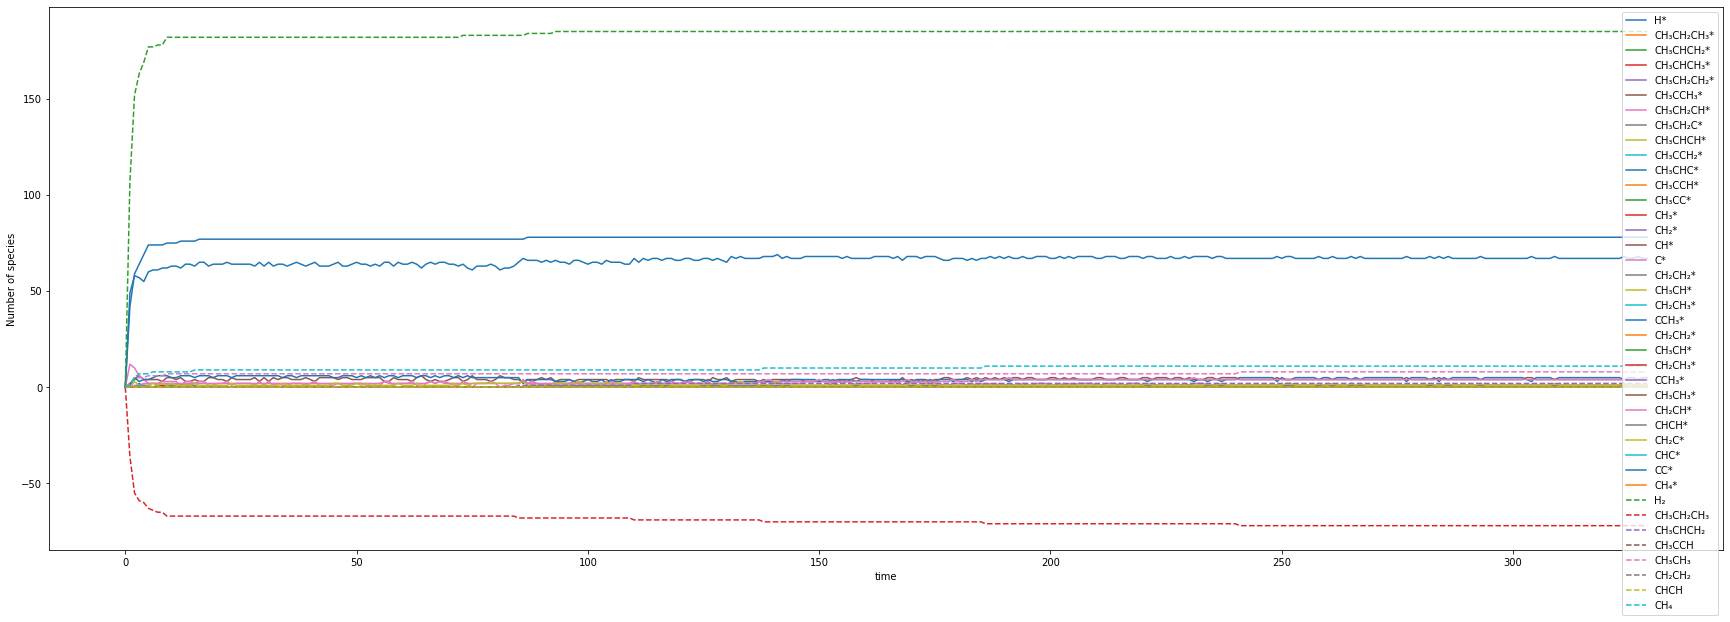

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
#ax.plot(rere.iloc[:,5:100]) #all
ax.plot(rere.iloc[:,5:specnum1-8]) #ads
ax.plot(rere.iloc[:,specnum1-8:50],'--') #gas

ax.set_xlabel('time')
ax.set_ylabel('Number of species')
ax.legend(ads+gas)

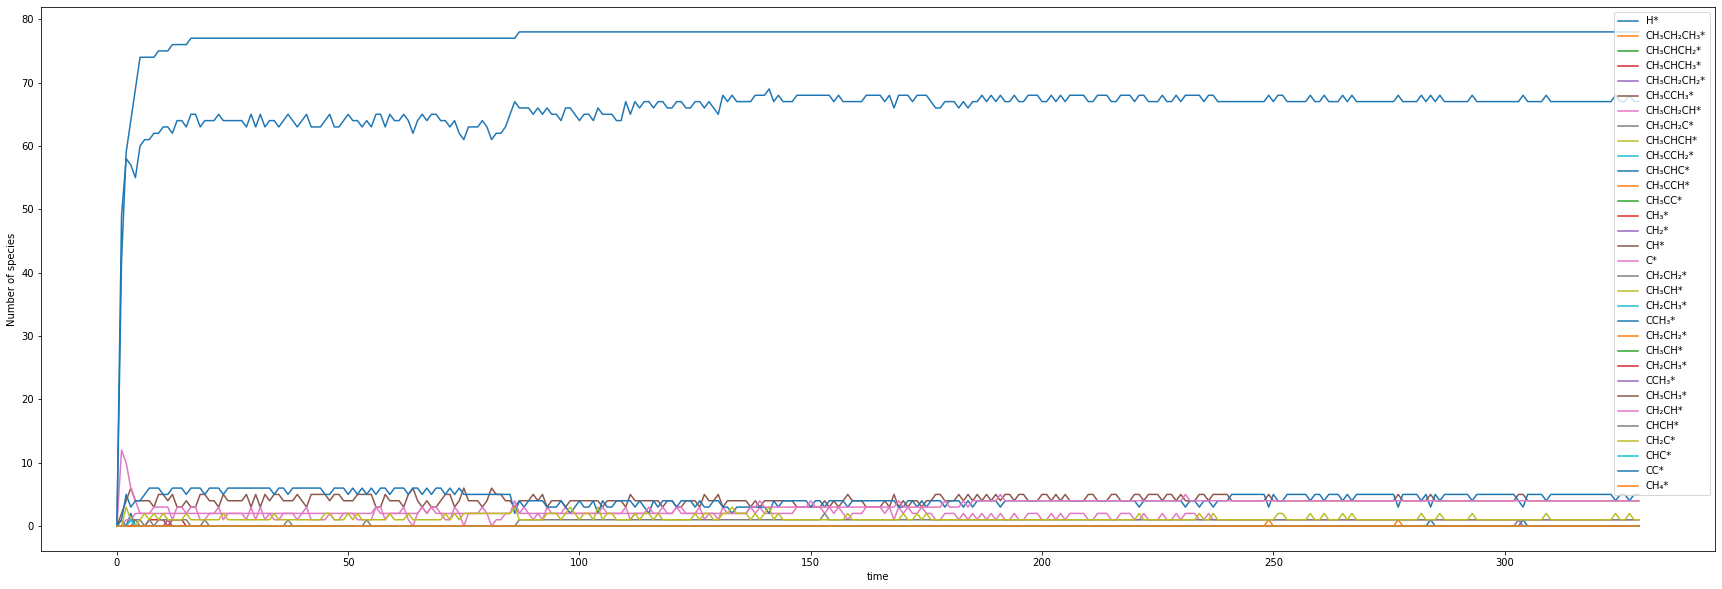

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
#ax.plot(rere.iloc[:,5:100]) #all
ax.plot(rere.iloc[:,5:specnum1-8]) #ads

ax.set_xlabel('time')
ax.set_ylabel('Number of species')
ax.legend(ads)

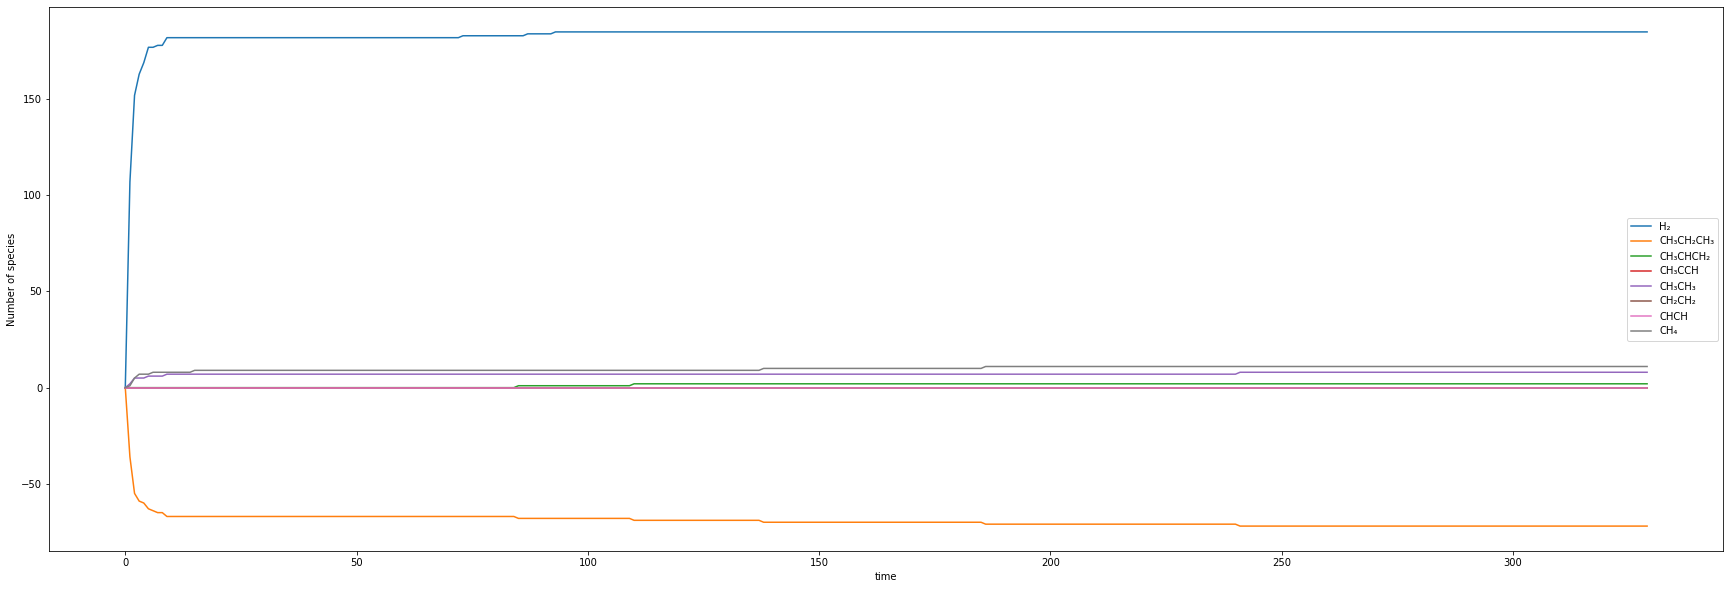

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
#ax.plot(rere.iloc[:,5:100]) #all
ax.plot(rere.iloc[:,specnum1-8:50]) #gas

ax.set_xlabel('time')
ax.set_ylabel('Number of species')
ax.legend(gas[0:])

#Fwd-Bwd로 나오도록

#total

['Overall', 'CH₃CHCH₂(g)→CH₃CHCH₂*_fwd', 'CH₃CHCH₂(g)→CH₃CHCH₂*_rev', 'CH₃CCH(g)→CH₃CCH*_fwd', 'CH₃CCH(g)→CH₃CCH*_rev', 'CH₂CH₂(g)→CH₂CH₂*_fwd', 'CH₂CH₂(g)→CH₂CH₂*_rev', 'CHCH(g)→CHCH*_fwd', 'CHCH(g)→CHCH*_rev', 'H₂(g)→₂H*_fwd', 'H₂(g)→₂H*_rev', 'CH₃CH₂CH₃(g)→CH₃CHCH₃*+H*_fwd', 'CH₃CH₂CH₃(g)→CH₃CHCH₃*+H*_rev', 'CH₃CH₂CH₃(g)→CH₃CH₂CH₂*+H*_fwd', 'CH₃CH₂CH₃(g)→CH₃CH₂CH₂*+H*_rev', 'CH₃CHCH₃*→CH₃CHCH₂*+H*_fwd', 'CH₃CHCH₃*→CH₃CHCH₂*+H*_rev', 'CH₃CH₂CH₂*→CH₃CHCH₂*+H*_fwd', 'CH₃CH₂CH₂*→CH₃CHCH₂*+H*_rev', 'CH₃CH₂CH₂*→CH₃CH₂CH*+H*_fwd', 'CH₃CH₂CH₂*→CH₃CH₂CH*+H*_rev', 'CH₃CHCH₃*→CH₃CCH₃*+H*_fwd', 'CH₃CHCH₃*→CH₃CCH₃*+H*_rev', 'CH₃CH₂CH*→CH₃CH₃C*+H*_fwd', 'CH₃CH₂CH*→CH₃CH₃C*+H*_rev', 'CH₃CH₂CH*→CH₃CHCH*+H*_fwd', 'CH₃CH₂CH*→CH₃CHCH*+H*_rev', 'CH₃CHCH₂*→CH₃CHCH*+H*_fwd', 'CH₃CHCH₂*→CH₃CHCH*+H*_rev', 'CH₃CHCH₂*→CH₃CCH₂*+H*_fwd', 'CH₃CHCH₂*→CH₃CCH₂*+H*_rev', 'CH₃CCH₃*→CH₃CCH₂*+H*_fwd', 'CH₃CCH₃*→CH₃CCH₂*+H*_rev', 'CH₃CHCH*→CH₃CHC*+H*_fwd', 'CH₃CHCH*→CH₃CHC*+H*_rev', 'CH₃CHCH*→CH₃CCH*+H*_fwd', 'CH₃CHCH*

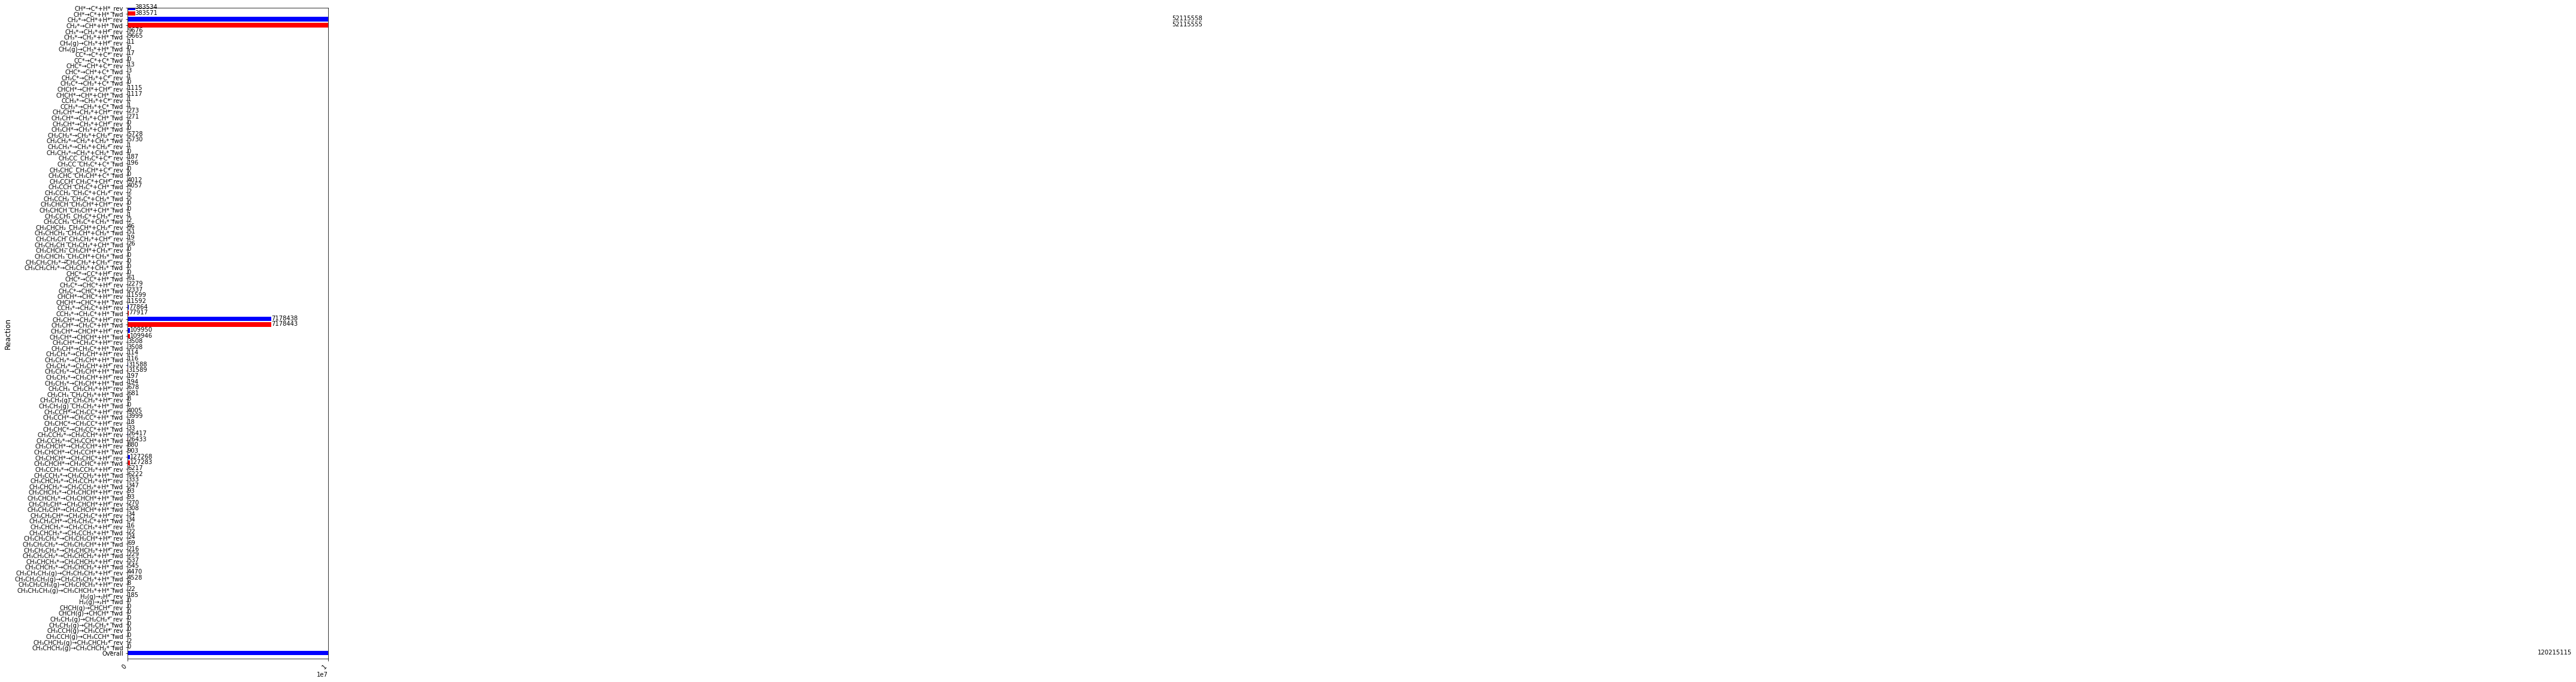

In [ ]:
# Read the Example1.txt
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


plt.rcParams["figure.figsize"] = (6,20)
data = pd.read_csv("/content/procstat_output.csv", encoding= 'unicode_escape')
config =[]
procstat =[]
species = []
spe=data.columns[0].split()
j=0
for i in spe:
  species.append(spe[j].translate(subscript))
  j=j+1
i=1
k=0
all = [] #전체 2차원배열
print(species,end =' ')
for row in data.values:
  row_split=row[0].split()
  #print(row_split[0])
  if(i%3 == 0):
    temp = []
    temp.append(row_split)
    all.extend(temp)
  elif(i%3==1):
    config.append(row_split[1])
  i+=1
  k+=1
print('\n')
'''for i in all :
    for j in i:
        print(j,end=" ")
    print()
'''
ax = plt.gca()
ax.set_ylim([0, 40])
ax.set_xlim([0, 10000000])  # 매번 그래프마다 바꾸어주어야 함, 값에 따라
plt.ylabel('Reaction', fontsize=12)
plt.yticks(np.arange(len(species)))
plt.yticks((np.arange(len(species)))+1,species)
plt.xticks(np.arange(0,100,step = 10))
y= np.arange(len(species))
#time = int(input("select configuration: "))
time=len(rere)-2
print(time)
barh = []
i=0
print(len(species))
for k in range(len(species)) :
  barh.append(int(all[time][k]))
  p = all[time][k]
  plt.text(int(p),k+0.8,str(all[time][k]))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000000)) # 축 간격 이것도 그래프마다 적절히 바꾸기
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
)
#color append를 해서 for문으로 color 배열을 만든다 
plt.barh(y+1,barh,color = ['b','r','b','r','b','r','b','r','b','r','b','r','b','r','b','r','b','r'])  #이거는 색깔이라 적절히 고쳐주어야함

plt.show()

['Overall', 'CH₃CHCH₂(g)→CH₃CHCH₂*_fwd', 'CH₃CHCH₂(g)→CH₃CHCH₂*_rev', 'CH₃CCH(g)→CH₃CCH*_fwd', 'CH₃CCH(g)→CH₃CCH*_rev', 'CH₂CH₂(g)→CH₂CH₂*_fwd', 'CH₂CH₂(g)→CH₂CH₂*_rev', 'CHCH(g)→CHCH*_fwd', 'CHCH(g)→CHCH*_rev', 'H₂(g)→₂H*_fwd', 'H₂(g)→₂H*_rev', 'CH₃CH₂CH₃(g)→CH₃CHCH₃*+H*_fwd', 'CH₃CH₂CH₃(g)→CH₃CHCH₃*+H*_rev', 'CH₃CH₂CH₃(g)→CH₃CH₂CH₂*+H*_fwd', 'CH₃CH₂CH₃(g)→CH₃CH₂CH₂*+H*_rev', 'CH₃CHCH₃*→CH₃CHCH₂*+H*_fwd', 'CH₃CHCH₃*→CH₃CHCH₂*+H*_rev', 'CH₃CH₂CH₂*→CH₃CHCH₂*+H*_fwd', 'CH₃CH₂CH₂*→CH₃CHCH₂*+H*_rev', 'CH₃CH₂CH₂*→CH₃CH₂CH*+H*_fwd', 'CH₃CH₂CH₂*→CH₃CH₂CH*+H*_rev', 'CH₃CHCH₃*→CH₃CCH₃*+H*_fwd', 'CH₃CHCH₃*→CH₃CCH₃*+H*_rev', 'CH₃CH₂CH*→CH₃CH₃C*+H*_fwd', 'CH₃CH₂CH*→CH₃CH₃C*+H*_rev', 'CH₃CH₂CH*→CH₃CHCH*+H*_fwd', 'CH₃CH₂CH*→CH₃CHCH*+H*_rev', 'CH₃CHCH₂*→CH₃CHCH*+H*_fwd', 'CH₃CHCH₂*→CH₃CHCH*+H*_rev', 'CH₃CHCH₂*→CH₃CCH₂*+H*_fwd', 'CH₃CHCH₂*→CH₃CCH₂*+H*_rev', 'CH₃CCH₃*→CH₃CCH₂*+H*_fwd', 'CH₃CCH₃*→CH₃CCH₂*+H*_rev', 'CH₃CHCH*→CH₃CHC*+H*_fwd', 'CH₃CHCH*→CH₃CHC*+H*_rev', 'CH₃CHCH*→CH₃CCH*+H*_fwd', 'CH₃CHCH*

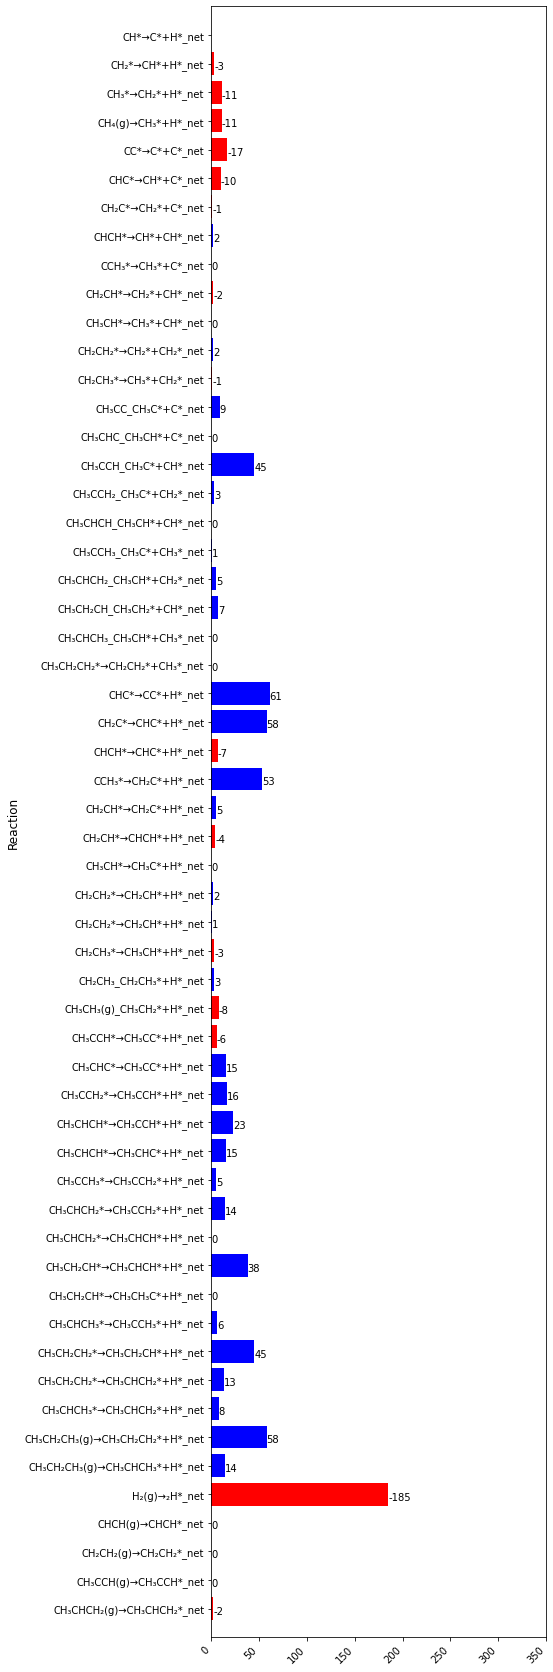

In [ ]:
# Read the Example1.txt
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



subscript = str.maketrans("0123456789-", "₀₁₂₃₄₅₆₇₈₉→")

plt.rcParams["figure.figsize"] = (6,30)
data = pd.read_csv("/content/procstat_output.csv", encoding= 'unicode_escape')
config =[]
procstat =[]
species = []
net_species = []
temper = []
spe=data.columns[0].split()
j=0

for i in spe:
  species.append(spe[j].translate(subscript))
  j=j+1
i=1
k=0
all = [] #전체 2차원배열
print(species,end =' ')
for row in data.values:
  row_split=row[0].split()
  #print(row_split[0])
  if(i%3 == 0):
    temp = []
    temp.append(row_split)
    all.extend(temp)
  elif(i%3==1):
    config.append(row_split[1])
  i+=1
  k+=1
print('\n')
'''for i in all :
    for j in i:
        print(j,end=" ")
    print()
'''
for j in range(0,len(species)//2):
  temper.append(species[2*j+1])
net_species = [s.replace("fwd", "net") for s in temper] # y축에 대한 정보를 net으로 이름 바꾸기

ax = plt.gca()
ax.set_ylim([0, 40])
ax.set_xlim([0, 350])  # 매번 그래프마다 바꾸어주어야 함, 값에 따라
plt.ylabel('Reaction', fontsize=12)
plt.yticks(np.arange(len(net_species)+2))
plt.yticks((np.arange(len(net_species)))+1,net_species)
plt.xticks(np.arange(0,100,step = 10))
len2=int((len(net_species)-1))
y= np.arange(len2)
#time = int(input("select configuration: "))
#time=
barh = []
temp2=[]
real=[]
real_barh = []
i=0
print(int((len(net_species)-1)))
#for i in range(len2):
#   print(all[time][2*k+1])
for k in range(len2):
  #temp2=int(all[time][2*k+1])-int(all[time][2*k+2])
  #real.append(temp2)
  barh.append(abs(int(all[time][2*k+1])-int(all[time][2*k+2]))) #절대값으로 뽑아서 한쪽방향으로 몰기
  real_barh.append(int(all[time][2*k+1])-int(all[time][2*k+2]))
  p = int(all[time][2*k+1])-int(all[time][2*k+2])
  plt.text(abs(int(p)),k+0.8,str(int(all[time][2*k+1])-int(all[time][2*k+2])))
ax.xaxis.set_major_locator(ticker.MultipleLocator(50)) # 축 간격 이것도 그래프마다 적절히 바꾸기
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
)
print(barh)
print(barh[0])

#color append를 해서 for문으로 color 배열을 만든다 
colors = ['r' if i<0 else 'b' for i in real_barh]
plt.barh(y+1,barh,color=colors)  #이거는 색깔이라 적절히 고쳐주어야함

plt.show()

Plotly로 테스트겸 그려봄. 커스터마이징 필요.

In [ ]:
import plotly.express as px
fig = px.bar(x=y+1, y=barh)
fig.show()

#To do


1.  coverage로 나타내기 (모든 흡착물 데이터를 /100)

2.  log로 그리기 (log10으로)

3. 0인애들은 제외하고 그리기

4. barplot에서 C3,C2,cracking나눠서 plot하기

5.  각 라인에 해당하는 흡착종을 assign하는 코드
6. Sankey plot


#Sankey diagram

In [ ]:
print(barh) # [32, 0, 0, 0, 238, 63, 62, 62, 62, 0, 1, 0, 0, 56, 13, 1, 30, 26, 15, 28, 37, 17, 1, 16, 1, 6, 0, 0, 5, 0, 2, 5, 32, 0, 0, 0, 23, 1, 0, 1, 4, 0, 31, 0, 0, 1, 0, 2, 0, 0, 29, 0, 4, 2, 20]
print(net_species)

[2, 0, 0, 0, 185, 14, 58, 8, 13, 45, 6, 0, 38, 0, 14, 5, 15, 23, 16, 15, 6, 8, 3, 3, 1, 2, 0, 4, 5, 53, 7, 58, 61, 0, 0, 7, 5, 1, 0, 3, 45, 0, 9, 1, 2, 0, 2, 0, 2, 1, 10, 17, 11, 11, 3]
['CH₃CHCH₂(g)→CH₃CHCH₂*_net', 'CH₃CCH(g)→CH₃CCH*_net', 'CH₂CH₂(g)→CH₂CH₂*_net', 'CHCH(g)→CHCH*_net', 'H₂(g)→₂H*_net', 'CH₃CH₂CH₃(g)→CH₃CHCH₃*+H*_net', 'CH₃CH₂CH₃(g)→CH₃CH₂CH₂*+H*_net', 'CH₃CHCH₃*→CH₃CHCH₂*+H*_net', 'CH₃CH₂CH₂*→CH₃CHCH₂*+H*_net', 'CH₃CH₂CH₂*→CH₃CH₂CH*+H*_net', 'CH₃CHCH₃*→CH₃CCH₃*+H*_net', 'CH₃CH₂CH*→CH₃CH₃C*+H*_net', 'CH₃CH₂CH*→CH₃CHCH*+H*_net', 'CH₃CHCH₂*→CH₃CHCH*+H*_net', 'CH₃CHCH₂*→CH₃CCH₂*+H*_net', 'CH₃CCH₃*→CH₃CCH₂*+H*_net', 'CH₃CHCH*→CH₃CHC*+H*_net', 'CH₃CHCH*→CH₃CCH*+H*_net', 'CH₃CCH₂*→CH₃CCH*+H*_net', 'CH₃CHC*→CH₃CC*+H*_net', 'CH₃CCH*→CH₃CC*+H*_net', 'CH₃CH₃(g)_CH₃CH₂*+H*_net', 'CH₂CH₃_CH₂CH₃*+H*_net', 'CH₂CH₃*→CH₃CH*+H*_net', 'CH₂CH₂*→CH₂CH*+H*_net', 'CH₂CH₂*→CH₂CH*+H*_net', 'CH₃CH*→CH₃C*+H*_net', 'CH₂CH*→CHCH*+H*_net', 'CH₂CH*→CH₂C*+H*_net', 'CCH₃*→CH₂C*+H*_net', 'CHCH*→CHC*+H*

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()